In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

os.getcwd()

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


In [10]:
df = pd.read_csv('../../data/processed_data/full_df_positive_mental_provider.csv')
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation,RUCC
0,1,1,1001,AL,Autauga County,2011,1.0,9967.4,675.0,NaN,...,4.19,1.93,3.39,4.38,1.75,4.46,0.98,4.63,3.96,2.0
1,1,3,1003,AL,Baldwin County,2011,1.0,8321.8,2219.0,NaN,...,1.28,1.68,3.15,8.73,2.05,9.89,0.15,3.22,2.78,3.0
2,1,15,1015,AL,Calhoun County,2011,1.0,11719.6,2106.0,NaN,...,5.30,1.65,4.53,3.83,0.93,6.85,0.90,5.00,4.86,3.0
3,1,43,1043,AL,Cullman County,2011,1.0,9564.7,1245.0,NaN,...,9.50,2.30,3.76,5.03,1.51,10.39,0.75,5.95,6.09,4.0
4,1,55,1055,AL,Etowah County,2011,1.0,11812.3,1905.0,NaN,...,6.53,2.77,4.79,4.81,1.53,10.14,0.61,5.69,6.24,3.0


In [11]:
identifying_fields = ['State Abbreviation', 'Name', 'Release Year']
independent_fields = ['Median household income raw value', 'Some college raw value','Ratio of population to mental health providers']
dependent_fields = ['Poor mental health days raw value', 'Crude Rate']
filtered_df = df[identifying_fields + independent_fields + dependent_fields]
filtered_df.head(n=20)

,State Abbreviation,Name,Release Year,Median household income raw value,Some college raw value,Ratio of population to mental health providers,Poor mental health days raw value,Crude Rate
0,AL,Autauga County,2011,51622.0,0.554,50354.0,4.1,21.7
1,AL,Baldwin County,2011,51957.0,0.615,6076.0,4.1,18.2
2,AL,Calhoun County,2011,39997.0,0.499,9452.0,4.8,14.4
3,AL,Cullman County,2011,39276.0,0.460,20380.0,4.8,17.4
4,AL,Etowah County,2011,37264.0,0.561,10344.0,4.4,24.0
5,AL,Houston County,2011,42523.0,0.543,4298.0,4.9,11.7
6,AL,Jackson County,2011,36597.0,0.412,17645.0,4.8,18.8
7,AL,Jefferson County,2011,46269.0,0.632,1957.0,3.5,12.9
8,AL,Lauderdale County,2011,38592.0,0.562,11150.0,4.0,16.2
9,AL,Lee County,2011,41770.0,0.639,2560.0,4.2,8.3


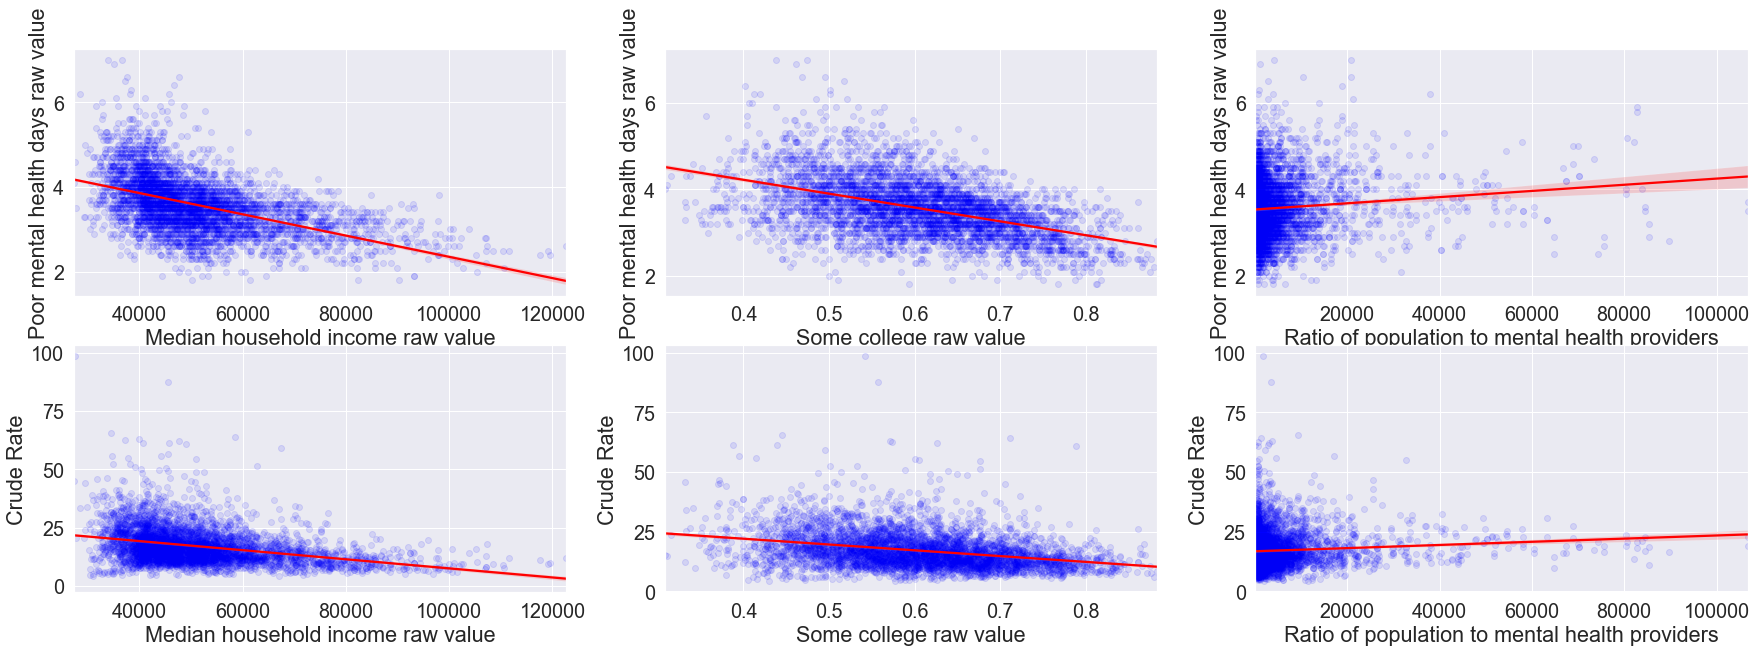

In [28]:
sns.set(font_scale = 1.6)
fig, ax = plt.subplots(2,3, figsize=(30,10))
for i, i_field in enumerate(independent_fields):
    for j, d_field in enumerate(dependent_fields):
        corr_df = filtered_df[[i_field, d_field]].replace([np.inf, -np.inf], np.nan).dropna()
        sns.regplot(ax=ax[j,i],x=i_field, y=d_field, data=corr_df, scatter_kws = {"color":"blue", "alpha":0.1}, line_kws={"color":"red"})
        
        r,p = stats.pearsonr(corr_df[i_field], corr_df[d_field])
#         plt.title('{} vs. {}'.format(d_field, i_field))
        
plt.show()

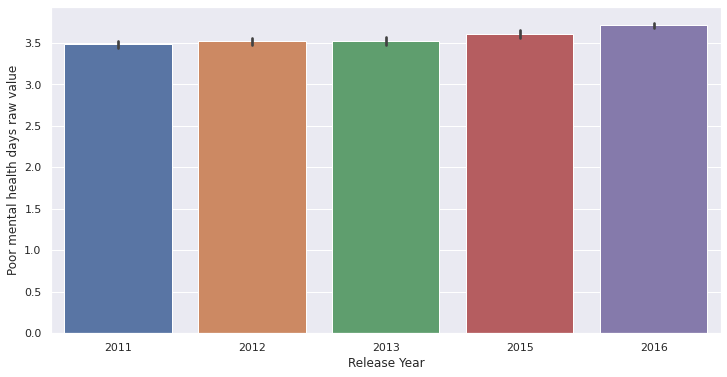

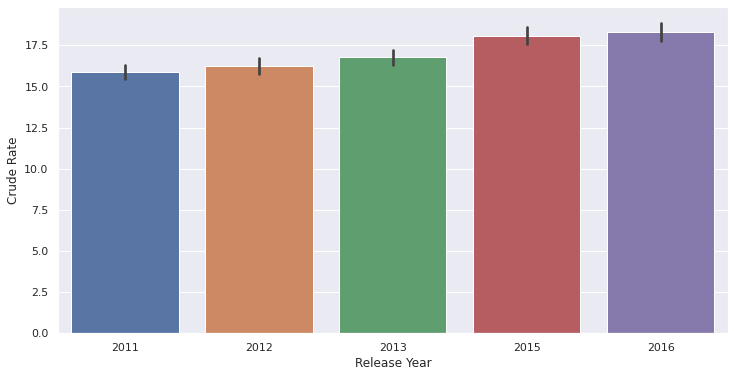

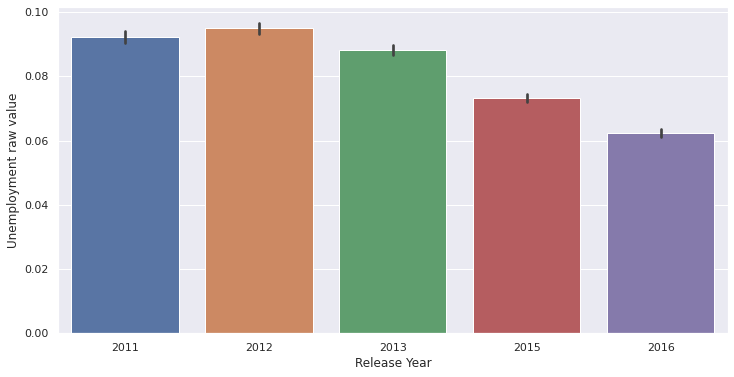

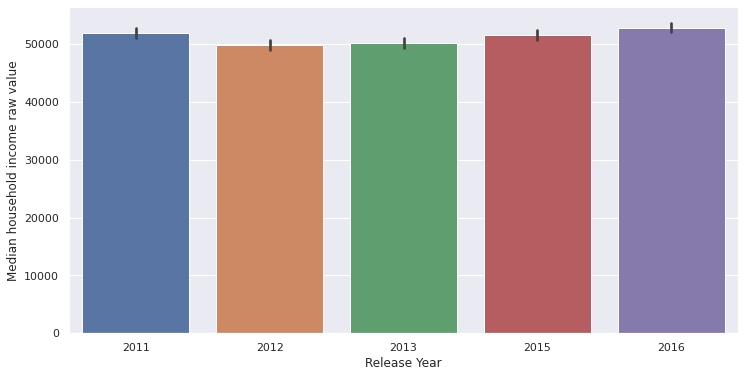

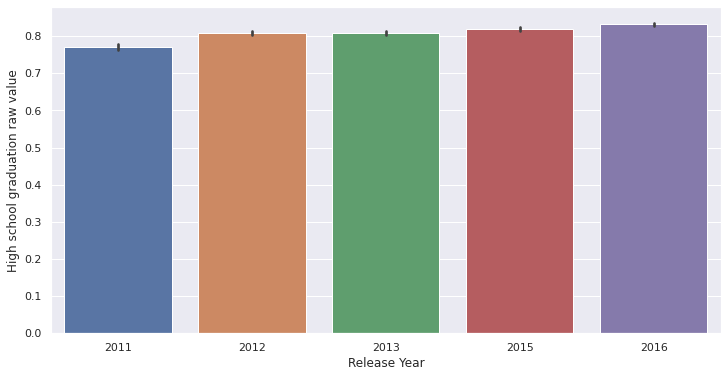

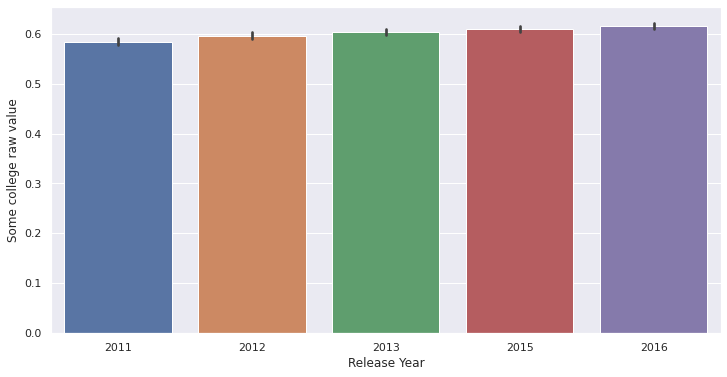

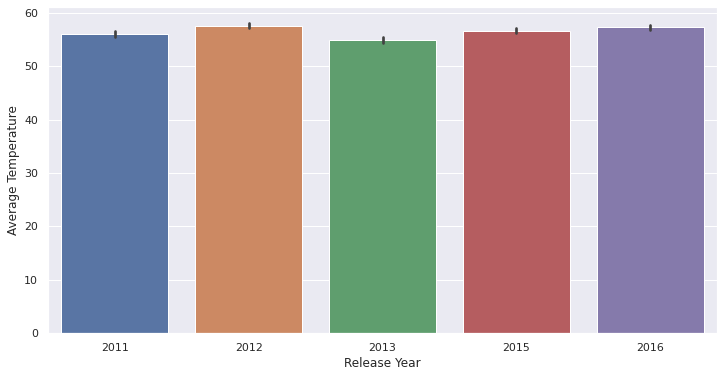

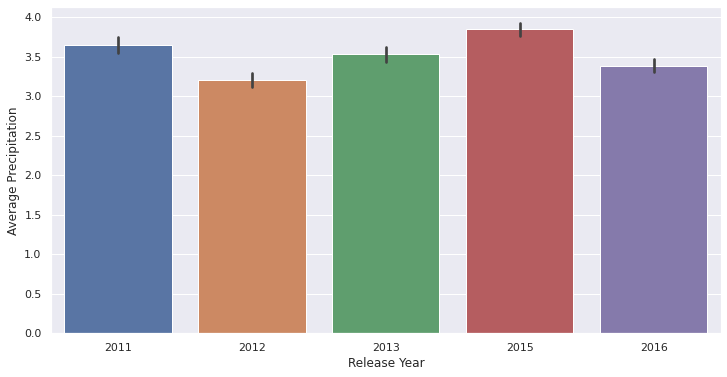

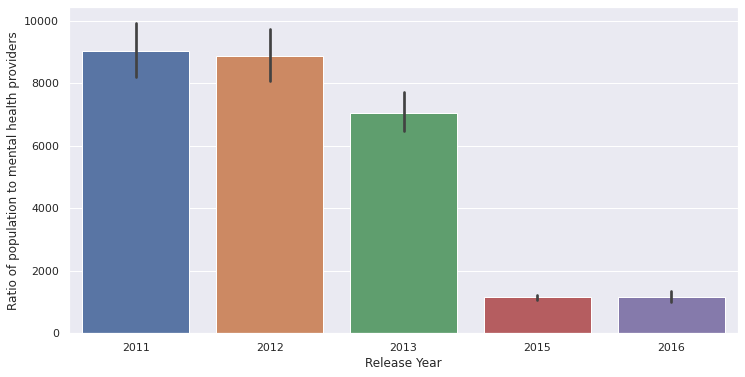

In [5]:
# Plot distributions on a single plot instead of on gridded subplots
years = sorted(filtered_df['Release Year'].unique()) # get unique year
# print(years)
for i, field in enumerate(dependent_fields + independent_fields): # create bar plots for all dependent fields
    plt.figure(i, figsize=(12,6))
    sns.barplot(x='Release Year', y=field, data=filtered_df)
    plt.show()